# Credit card fraud detection

#### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content:
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize']=14,7
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).T

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]

In [7]:
len(fraud)

492

In [8]:
len(normal)

284315

([<matplotlib.axis.XTick at 0x1ebb2555648>,
 <a list of 2 Text xticklabel objects>)

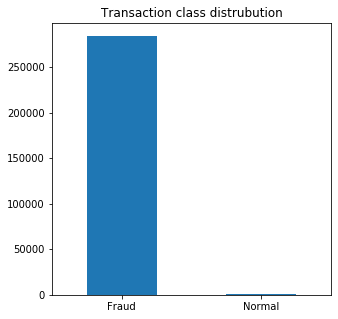

In [12]:
plt.figure(figsize=(5,5))
count_classes=pd.value_counts(data['Class'])
count_classes.plot(kind='bar',rot=0)
plt.title('Transaction class distrubution')
plt.xticks(range(2),['Fraud','Normal'])


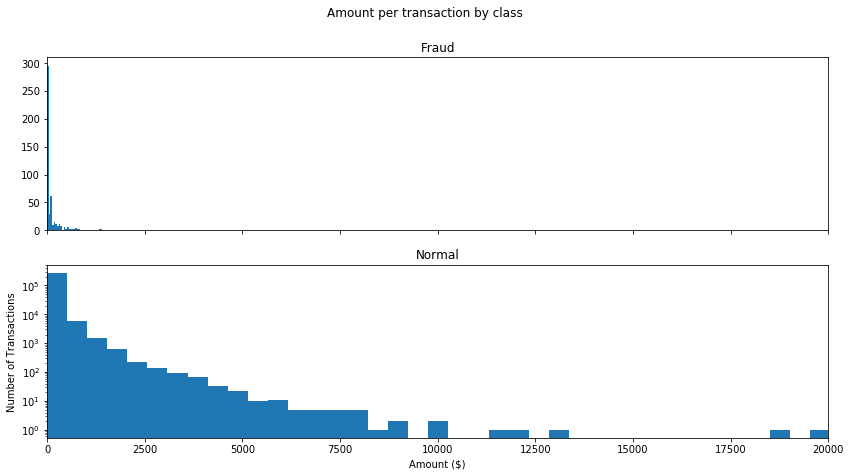

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

In [18]:
x = data[data.columns.difference(['Class'])]
y = data['Class']

In [19]:
x_train, x_test, y_train , y_test= train_test_split(x,y, test_size=0.3)

### Smotetomek: It is one of the sampling technique where it is the combination of over and under sampling

In [20]:
from imblearn.combine import SMOTETomek

In [21]:
smk=SMOTETomek(0.7)
x_train_s, y_train_s = smk.fit_sample(x_train, y_train)

In [22]:
from collections import Counter

In [23]:
print('original dataset shape {}'.format(Counter(y)))
print('resampled dataset shape {}'.format(Counter(y_train_s)))

original dataset shape Counter({0: 284315, 1: 492})
resampled dataset shape Counter({0: 198286, 1: 138575})


In [24]:
print("xtrain.shape : ", x_train_s.shape)
print("xtest.shape  : ", x_test.shape)
print("ytrain.shape : ", y_train_s.shape)
print("ytest.shape  : ", y_test.shape)

xtrain.shape :  (336861, 30)
xtest.shape  :  (85443, 30)
ytrain.shape :  (336861,)
ytest.shape  :  (85443,)


# Decision Tree Classification

In [39]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(x_train_s, y_train_s)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred_decision_tree = dt_classifier.predict(x_test)

In [41]:
cm_decision = confusion_matrix(y_test, y_pred_decision_tree)
print("confusion Marix : \n", cm_decision)
print("===============================================================")
print('accuracy score :', accuracy_score(y_test,y_pred_decision_tree))
print("===============================================================")
print(classification_report(y_test,y_pred_decision_tree))

confusion Marix : 
 [[85273     8]
 [  105    57]]
accuracy score : 0.9986774808936952
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85281
           1       0.88      0.35      0.50       162

    accuracy                           1.00     85443
   macro avg       0.94      0.68      0.75     85443
weighted avg       1.00      1.00      1.00     85443



### Naive Bayes

In [42]:
nb=GaussianNB()
nb.fit(x_train_s, y_train_s)

GaussianNB()

In [43]:
y_pred = nb.predict(x_test)

In [44]:
print(confusion_matrix(y_test, y_pred))
print("===============================================================")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("===============================================================")
print(classification_report(y_test,y_pred))

[[85239    42]
 [  155     7]]
Accuracy Score : 0.9976943693456456
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85281
           1       0.14      0.04      0.07       162

    accuracy                           1.00     85443
   macro avg       0.57      0.52      0.53     85443
weighted avg       1.00      1.00      1.00     85443



### Logistics regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()
model = model.fit(x_train_s, y_train_s)

In [47]:
y_pred = model.predict(x_test)

In [48]:
print(confusion_matrix(y_test, y_pred))
print("===============================================================")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("===============================================================")
print(classification_report(y_test,y_pred))

[[85260    21]
 [   37   125]]
Accuracy Score : 0.9993211848834895
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85281
           1       0.86      0.77      0.81       162

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

